In [6]:
from scipy import stats
import numpy as np
import pandas as pd
import time
import random
from implementations import all_implementations
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
data = pd.read_csv('data.csv')
data

,qs1,qs2,qs3,qs4,qs5,merge1,partition_sort
0,0.086293,0.113001,0.103556,0.218460,0.230162,0.197368,0.049589
1,0.091774,0.112546,0.069684,0.075595,0.075624,0.090588,0.074657
2,0.084119,0.080176,0.155752,0.168733,0.108104,0.134066,0.093747
3,0.275229,0.398234,0.161934,0.117852,0.092966,0.088572,0.055878
4,0.081628,0.093851,0.106505,0.072663,0.056669,0.064347,0.046272
...,...,...,...,...,...,...,...
395,0.048346,0.058861,0.057380,0.056051,0.056912,0.063282,0.029217
396,0.046146,0.062357,0.057906,0.057072,0.062617,0.060388,0.040495
397,0.049090,0.067705,0.066010,0.058136,0.057003,0.067402,0.028818
398,0.060200,0.065141,0.070814,0.061883,0.054030,0.073961,0.031547


In [15]:
anova = stats.f_oneway(data['qs1'], data['qs2'], data['qs3'], data['qs4'], data['qs5'], data['merge1'], data['partition_sort'])
print(anova)
print("anova", anova.pvalue)

F_onewayResult(statistic=44.63955242599513, pvalue=2.2013216599168873e-52)
anova 2.2013216599168873e-52


In [9]:
x_data = pd.DataFrame({'qs1': data['qs1'],
                        'qs2': data['qs2'],
                        'qs3': data['qs3'],
                        'qs4': data['qs4'],
                        'qs5': data['qs5'],
                        'merge1': data['merge1'],
                        'partition_sort': data['partition_sort']})
x_melt = pd.melt(x_data)
posthoc = pairwise_tukeyhsd(x_melt['value'], x_melt['variable'], alpha=0.05)
print(posthoc)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
        merge1 partition_sort  -0.0348   -0.0  -0.043 -0.0267   True
        merge1            qs1  -0.0183    0.0 -0.0264 -0.0101   True
        merge1            qs2   0.0008 0.9999 -0.0073   0.009  False
        merge1            qs3  -0.0005    1.0 -0.0086  0.0076  False
        merge1            qs4  -0.0073 0.1121 -0.0155  0.0008  False
        merge1            qs5  -0.0052 0.4992 -0.0133   0.003  False
partition_sort            qs1   0.0166    0.0  0.0084  0.0247   True
partition_sort            qs2   0.0357   -0.0  0.0275  0.0438   True
partition_sort            qs3   0.0343   -0.0  0.0262  0.0425   True
partition_sort            qs4   0.0275   -0.0  0.0194  0.0357   True
partition_sort            qs5   0.0297   -0.0  0.0215  0.0378   True
           qs1            qs2   0.

0.052491674423217775 0.07160723507404326 0.07027297556400298 0.0634610414505005 0.06560499370098113 0.07077221810817717 0.03594031512737274


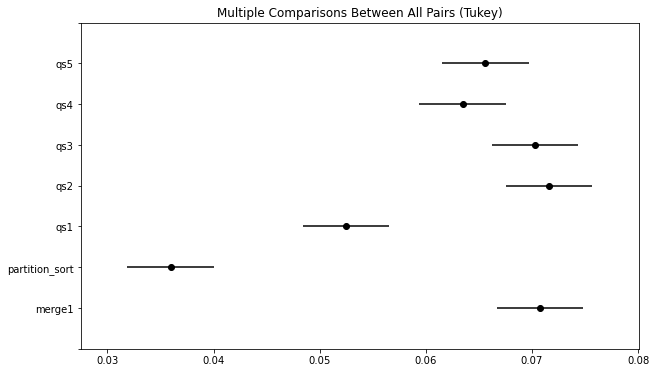

In [13]:
fig = posthoc.plot_simultaneous()
print(data['qs1'].mean(), data['qs2'].mean(), 
      data['qs3'].mean(), data['qs4'].mean(), 
      data['qs5'].mean(), data['merge1'].mean(), 
      data['partition_sort'].mean())